## 2. Naive Bayes

### 2.1 Theoretical part 

Naive Bayes, NB is one of the most well-known classify algorithm. The classifier is based on Bayes'rule. Due to this origin, it benefits from the solid mathematical foundation as well as stable classify efficiency.

NB requires seldom parameters, not sensitive to NaN data. The old junk email clf is utilized NB to complete recognize job.

+ Conditional Probability
$$ p(A|B) = \frac{p(A,B)}{p(B)} = \frac{p(B|A) \cdot p(A)}{\sum_{a \in A} p(B|a) \cdot p(a)}$$

> 我们用一句话理解贝叶斯：世间很多事都存在某种联系，假设事件A和事件B。
> 人们常常使用已经发生的某个事件去推断我们想要知道的之间的概率。 例如，医生在确诊的时候，会根据病人的舌苔、心跳等来判断病人得了什么病。对病人来说，只会关注得了什么病，医生会通道已经发生的事件来 确诊具体的情况。这里就用到了贝叶斯思想，A是已经发生的病人症状，在A发生的条件下是B_i的概率。

NB 假设所有特征的出现相互独立，互不影响，每个特征同等重要。

NB 一般应用在文本分类，垃圾邮件的分类，信用评估，钓鱼网站检测等。

Hint:

当你不能准确知悉一个事物的本质时，你可以依靠与事物特定本质相关的事件出现的多少去判断其本质属性的概率。
支持某项属性的事件发生得愈多，则该属性成立的可能性就愈大。
$$
p(类别|特征) = \frac{ p(类别) \cdot p(特征|类别)}{p(特征)}
$$

https://zhuanlan.zhihu.com/p/37575364

#### Principles Illustration
##### Continuos Variable
$$ P(X^{(i)} = x^{(i)} | Y=c_k) = \frac{1}{\sqrt{2\pi \sigma_y^2}} exp (-\frac{(x^{(i)}-\mu_{c_k})^2}{2 \sigma^2_{c_k}})$$

我们把一个随机变量X服从数学期望为μ，方差为σ^2的数据分布称为高斯分布.

高斯朴素贝叶斯假设每个特征都服从高斯分布，对于每个特征我们一般使用平均值来估计μ和使用所有特征的方差估计σ^2。

##### Discrete Variable


### 2.2 Pratical part 

#### 2.2.1 Continuos Data

In [27]:
## Pkg Loading
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [28]:
iris_data = load_iris()
y = iris_data.target
X = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
X.head()
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=.2,random_state=0)

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

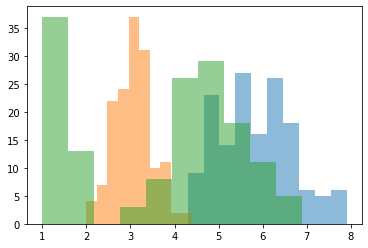

In [29]:
plt.hist(X.iloc[:,0], bins=10, alpha=.5)
plt.hist(X.iloc[:,1], bins=10, alpha=.5)
plt.hist(X.iloc[:,2], bins=10, alpha=.5)

通过分析发现训练数据是数值类型的数据，这里假设每个特征服从高斯分布，因此我们选择高斯朴素贝叶斯来进行分类计算。
> 这里并不严谨，参照上面分布图

In [30]:
### Train

### To calculate: 
# P(a) i.e. P(Y=ck)
# P(B|a) i.e. P(X=x | Y=ck) 
clf = GaussianNB(var_smoothing=1e-8)
clf.fit(X_tr, y_tr)

### Evaluate

from sklearn import metrics
y_tr_pred = clf.predict(X_tr)
y_te_pred = clf.predict(X_te)
# acc = np.sum(y_te == y_pred) / X_test.shape[0]
print('The accuracy of the LR is(train): %.3f'% metrics.accuracy_score(y_tr, y_tr_pred))
print('The accuracy of the LR is(test): %.3f'% metrics.accuracy_score(y_te, y_te_pred))


The accuracy of the LR is(train): 0.950
The accuracy of the LR is(test): 0.967


print('The accuracy of the LR is(train): %.3f'% metrics.accuracy_score(y_tr, y_tr_pred))

print('The accuracy of the LR is(test): %.3f'% metrics.accuracy_score(y_te, y_te_pred))

In [31]:
y_te_proba = clf.predict_proba(X_te)
print('The test predict Probability of each class:\n', y_te_proba[0,:])

The test predict Probability of each class:
 [1.63542393e-232 2.18880483e-006 9.99997811e-001]


#### 2.2.2 Discrete Data

In [32]:
# Loading Data
import random
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

# Simulating Data
rng = np.random.RandomState(1)
X = rng.randint(5, size=(600, 100)) # 600 samples, each sample is 100-D, each dimension is a int [0,4]
y = np.array([1,2,3,4,5,6] * 100)
data = np.c_[X,y]

random.shuffle(data)
X = data[:,:-1]
y = list(data[:,-1])
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=.2, random_state=0)

# Training Model
clf = CategoricalNB(alpha=1)
clf.fit(X_tr, y_tr)
acc = clf.score(X_te, y_te)
print("Test Acc: %.3f" % acc)

x = rng.randint(5, size=(1,100))
print(clf.predict_proba(x))

Test Acc: 0.633
[[4.70688755e-05 3.32695467e-03 8.38356485e-05 9.91495144e-01
  8.35293620e-05 4.96346770e-03]]


(array([ 87.,   0., 105.,   0., 102.,   0.,  84.,   0., 109., 113.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

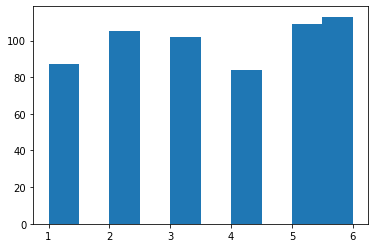

In [34]:
plt.hist(y)

In [ ]:
print(clf.predict(x))

[4]


clf = CategoricalNB(alpha=1)

alpha = 1 这个参数代表什么？
对于离散特征：

$$
P(X^{(j)} = x^{(j)} | Y = c_k) = \frac{ \sum_{i=1}^{N} I(x_i^j = a_{jl}, y_i=c_k) + \alpha}
{ \sum_{i=1}^{N} I(y_i = c_k) + S_j \alpha} 
$$
，对于每个变量多加了一个频数alpha。

当alpha=0，即是极大似然估计；

当alpha=1（通常），拉鲁拉斯平滑。（Laplace smoothing）# 避免：如果某个特征值在训练数据中没有出现，这时候会出现概率为0的情况，导致整个估计都为0，因为引入贝叶斯估计。

朴素贝叶斯算法的强假设：各特征之间相互独立。（对条件概率分步做了条件独立性的假设）

这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好。

而在属性相关性较小时，朴素贝叶斯性能最为良好。对于这一点，有半朴素贝叶斯之类的算法通过考虑部分关联性适度改进。
https://zhuanlan.zhihu.com/p/26262151